# example1
### 대출자들의 채무 상환 관련 데이터 - 상환 여부 예측

In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family = "Malgun Gothic")

# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화 (.dot확장자 파일 불러오기 등)
import graphviz

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split # train set / test set 분리

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("data/HMEQ.csv", engine = "python")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


### 데이터 설명
* 척도 : Binary
* BAD[이산형, Binary] : 1-대출 채무 불이행 / 0-상환 대출
* LOAN[연속형, interval] : 대출 요청 금액
* MORTDUE[연속형, interval] : 기존 모기지 금액
* VALUE[연속형, interval] : 현재 자산
* REASON[이산형, Binary] : 대출 목적(DebtCon-부채 정리,HomeImp-주택 개량)
* JOB[범주형, Nominal] : 6가지 직업 분류
* YOJ[연속형, interval] : 연차
* DEROG[연속형, interval] : 주요 손실보고
* DELINQ[연속형, interval] : 연체 신용 한도
* CLAGE[연속형, interval] : 최장 계좌 연속월
* NINQ[연속형, interval] : 최근 신용 한도
* CNLO[연속형, interval] : 신용 한도의 수
* DEBTINC[연속형, interval] : 부채 비율

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3734 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3667 non-null   object 
 6   YOJ      3543 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3718 non-null   float64
 9   CLAGE    3711 non-null   float64
 10  NINQ     3692 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [4]:
# Null 값 확인
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [5]:
# 중앙값으로 결측값 대체
df.fillna(df.median(), inplace = True)
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [6]:
df.isnull().sum()

BAD         0
LOAN        0
MORTDUE     0
VALUE       0
REASON      0
JOB        81
YOJ         0
DEROG       0
DELINQ      0
CLAGE       0
NINQ        0
CLNO        0
DEBTINC     0
dtype: int64

In [7]:
# get_dummies : 데이터의 문자형 변수에 대한 더미 변수 생성
df_dummy = pd.get_dummies(df)
df_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [9]:
df_y = df_dummy['BAD']
df_x = df_dummy.drop('BAD', axis = 1, inplace = False)

In [10]:
# train set / test set 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data size:{}".format(df_train_x.shape))
print("test data size:{}".format(df_test_x.shape))
df_train_x.head()

train data size:(2623, 18)
test data size:(1125, 18)


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
3164,27600,103898,130784.0,11.0,0,0.0,147.128398,0.0,29,42.009814,1,0,0,1,0,0,0,0
3314,30200,80951,116160.0,19.0,4,0.0,130.360362,0.0,58,50.352999,1,0,0,0,0,1,0,0
93,5700,74172,79846.0,0.0,0,0.0,157.009775,0.0,28,47.415229,1,0,0,0,0,1,0,0
1456,14900,22245,31531.0,7.0,0,0.0,91.074218,0.0,16,21.620580,1,0,0,1,0,0,0,0
3327,30500,57516,103086.0,3.0,0,0.0,166.199527,2.0,24,37.814089,1,0,0,1,0,0,0,0


## 모델 생성 - 기본 옵션으로 모델 생성

In [13]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.924


### ㄴ 모델 정확도는 train 100%, test 93.2%로 모델은 train 데이터에 과대적합

In [14]:
tree_uncustomized

DecisionTreeClassifier(random_state=1234)

## 모델 Parameter 변경 
### - max_depth : 최대 깊이 변경에 따른 모델 성능

In [29]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1, 15)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth= pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy 

# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.926,0.924
1,2,0.931,0.927
2,3,0.934,0.921
3,4,0.937,0.928
4,5,0.940,0.930
5,6,0.941,0.932
6,7,0.947,0.935
7,8,0.951,0.933
8,9,0.955,0.932
9,10,0.959,0.932


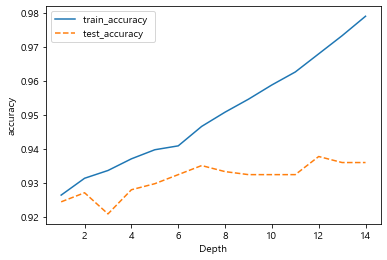

In [30]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("Depth")
plt.legend()

### ㄴ 최대 깊이 증가에 따라 모델의 정확도는 증가하며 Train/Test 데이터의 성능변화를 고려해 4 선택

In [21]:
# 변수명 저장
v_feature_name = df_train_x.columns

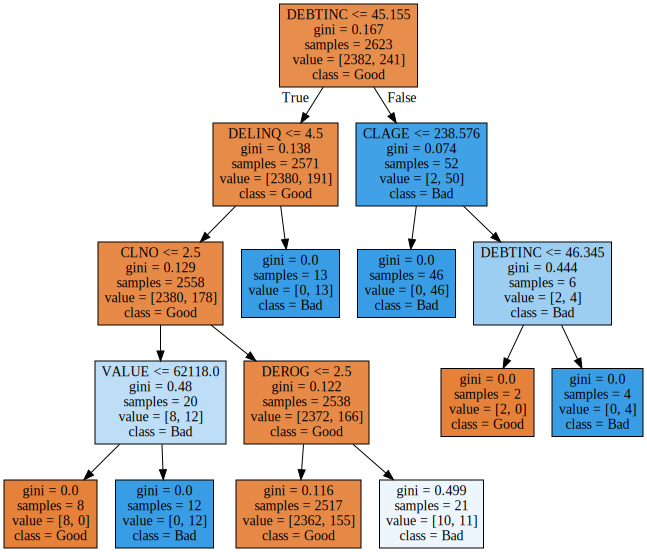

In [23]:
# 깊이가 4인 모델
tree_low = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장. (목표변수, 0:Good, 1:Bad)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

# graphviz를 이용해 트리 모델 시각화
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

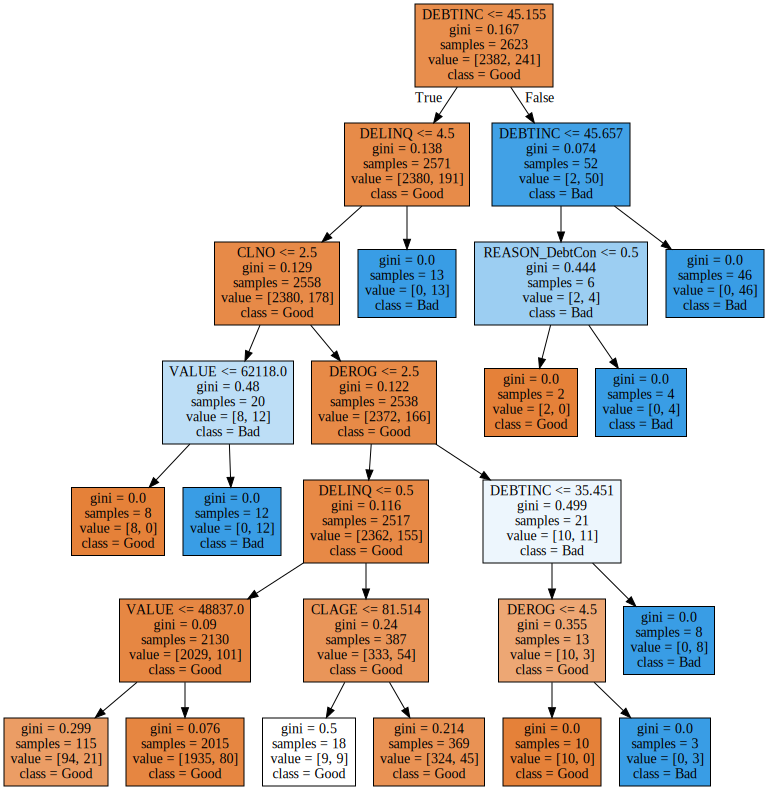

In [24]:
# 깊이가 6인 모델
tree_high = DecisionTreeClassifier(max_depth = 6, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 모델 Parameter 변경 
### - min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [31]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 4, random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split= pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy 

# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.936,0.928
1,20,0.936,0.928
2,30,0.933,0.921
3,40,0.933,0.921
4,50,0.933,0.921
5,60,0.933,0.921
6,70,0.933,0.921
7,80,0.933,0.921
8,90,0.933,0.921
9,100,0.933,0.921


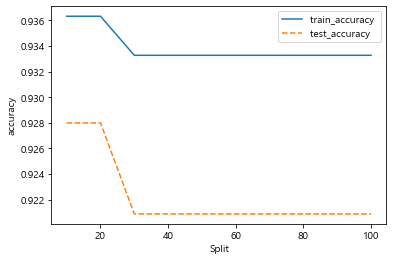

In [32]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_split, test_accuracy, linestyle = '--', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("Split")
plt.legend()

### ㄴ 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 Train/Test 데이터의 성능 변화를 고려해 20 선택

### - min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 : 자료 수 증가 시 과소적합 확인 필요

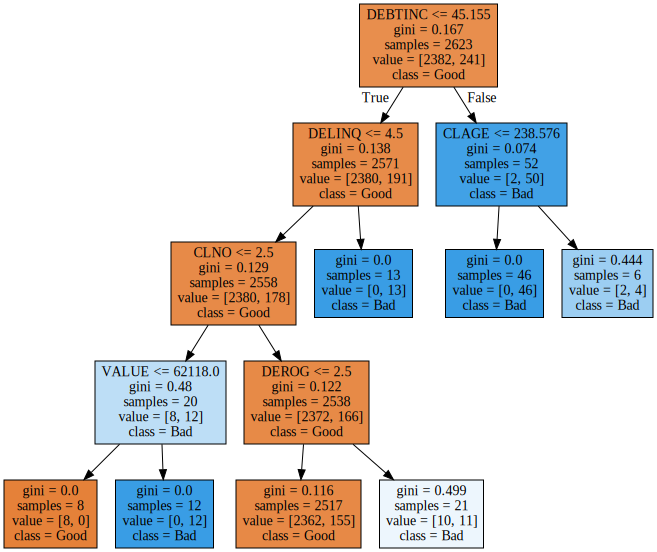

In [33]:
# 분리 노드의 최소 자료 수가 20인 모델
tree_low = DecisionTreeClassifier(max_depth = 4, min_samples_split = 20, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

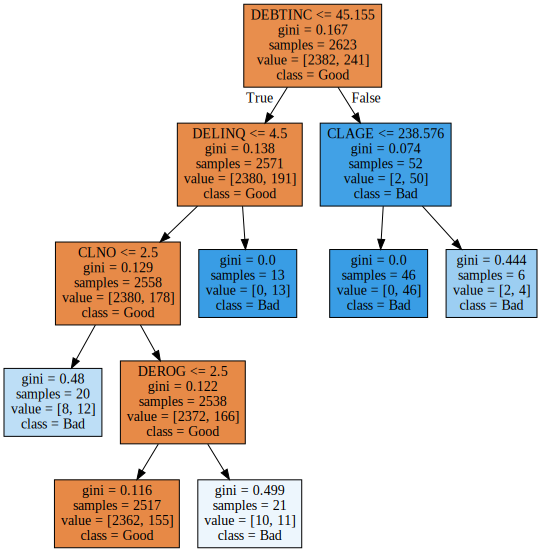

In [34]:
# 분리 노드의 최소 자료 수가 30인 모델
tree_high = DecisionTreeClassifier(max_depth = 4, min_samples_split = 30, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 모델 Parameter 변경 
### - min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [37]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# min_samples_leaf : 분할하기 위한 노드의 최소 샘플 수
para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, 
                                  min_samples_split = 20, max_depth = 4, random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf= pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy 

# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.936,0.928
1,4,0.936,0.928
2,6,0.936,0.928
3,8,0.936,0.928
4,10,0.936,0.928
5,12,0.933,0.921
6,14,0.932,0.916
7,16,0.932,0.919
8,18,0.932,0.919
9,20,0.932,0.919


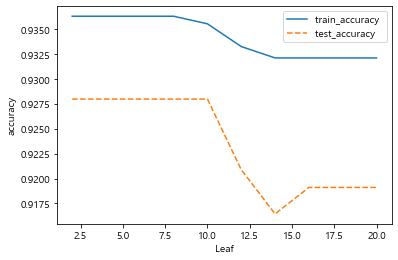

In [38]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("Leaf")
plt.legend()

### ㄴ 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 Train/Test 데이터의 성능 변화를 고려해 10 선택
### 분리노드의 최소 자료 수를 20으로 선택했으므로 8 또는 10 선택 가능

### - min_samples_split : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능 : 자료 수 증가 시 과소적합 확인 필요

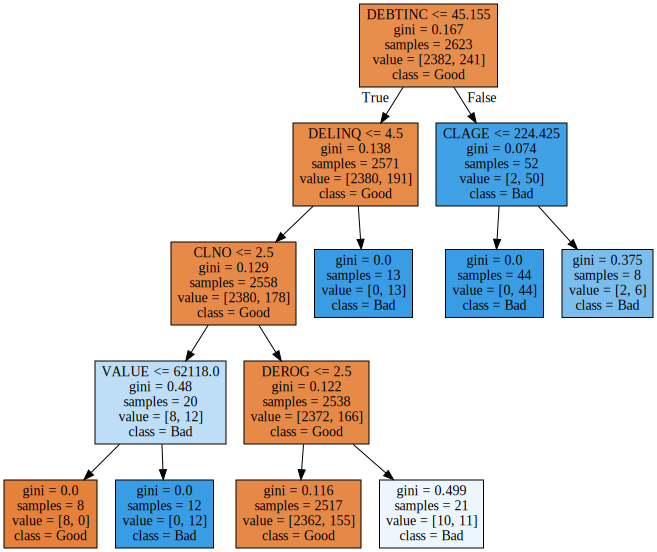

In [42]:
# 잎사귀의 최소 자료 수가 8인 모델
tree_low = DecisionTreeClassifier(max_depth = 4, min_samples_split = 20, min_samples_leaf = 8, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

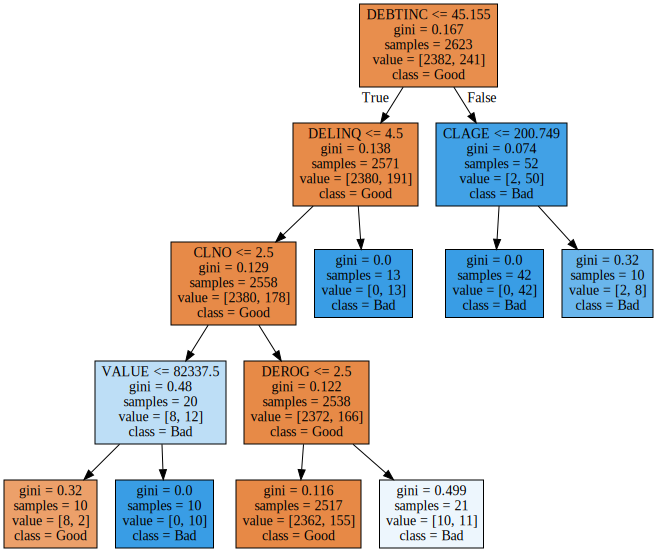

In [43]:
# 잎사귀의 최소 자료 수가 10인 모델
tree_high = DecisionTreeClassifier(max_depth = 4, min_samples_split = 20, min_samples_leaf = 10, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 최종 모델 선정
### - 최종 모델

In [41]:
tree_final = DecisionTreeClassifier(max_depth = 4, min_samples_split = 20, min_samples_leaf = 8, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                       random_state=1234)

### - 최종 모델 시각화

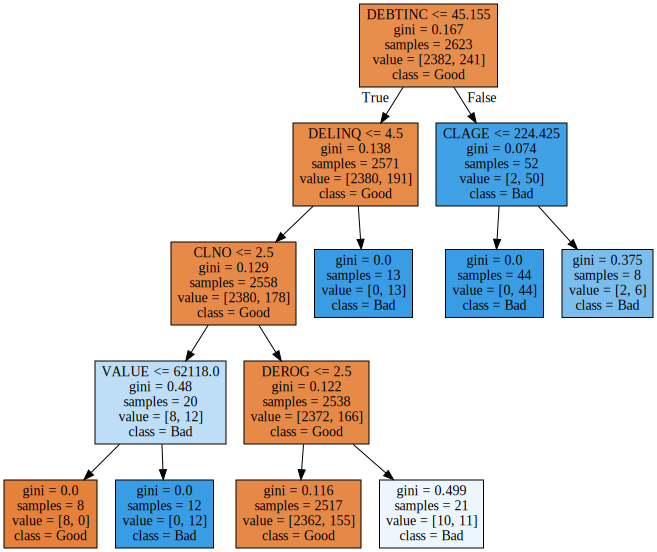

In [44]:
export_graphviz(tree_final, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### - 트리 모델 해석
- 트리 분리에 영향이 큰 변수는 DEBTINC, CLAGE, DELINQ 등
- 부채비율(DEBTINC) $\leqq$ 45.155 이면 True(자료 수 = 2571, Good 비율이 증가하고 gini 지수는 감소), $>$ 45.155 이면 False(자료 수 = 52, Bad 비율이 증가하고 gini 지수는 감소)로 분리
- 부채비율(DEBTINC) $>$ 45.155 & 최장 계좌 연속월(CLAGE) $\leqq$ 224.425 이면 전체 데이터가 Bad(불이행)으로 분리(자료 수 = 44, Bad 비율 = 100%, gini 지수 = 0)

## 최종 모델 평가
### - 최종 모델을 이용한 분류 예측

In [46]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.928

Confusion matrix: 
[[1015    6]
 [  75   29]]


ㄴ 정분류율은 92.8%

## 결론 도출
### - feature_importances_ : 설명변수의 중요도

In [47]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.602
5,DELINQ,0.168
8,CLNO,0.085
2,VALUE,0.072
4,DEROG,0.067
6,CLAGE,0.006
12,JOB_Mgr,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000
14,JOB_Other,0.000


Text(0, 0.5, '설명변수')

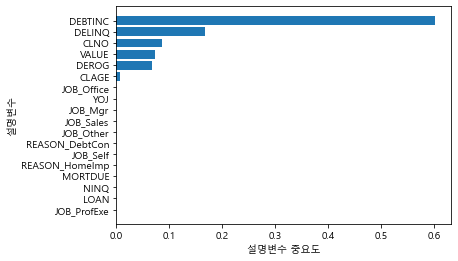

In [50]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))

plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

- 중요 설명변수 : 트리 생성 시 부채비율(DEBTINC), 연체된 신용 한도의 수(DELINQ) 순으로 영향이 크다고 할 수 있음
- 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 훈련 데이터에 따라 중요도는 변경될 수 있음

## 모델 Parameter 조정 - 추가
### - GridSearchCV를 이용한 최적 parameter 찾기

In [51]:
estimator = DecisionTreeClassifier()

# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
             "min_samples_leaf" : para_leaf}

# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter model: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=10)

best parameter model: 
{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10}

best score: 
0.935


- 최대 깊이(max_depth)가 9, 잎사귀의 최소 샘플 수(min_samples_leaf)가 4일 때 정확도가 93.5%
- GridSearchCV는 fit을 이용해 data를 적합시킬 때 train/validation 데이터로 나누어 cross-validation을 적용하므로 앞선 결과와 다를 수 있음